# Model Creation
In this notebook we make the models from the prpcessed data in data\processed

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

### Random Forest

RMSE: 7.57
R2 Score: 0.80


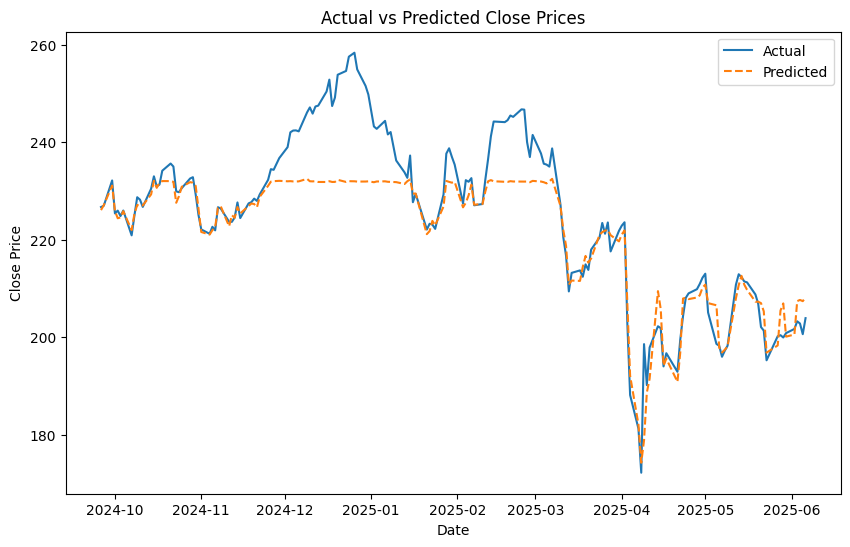

In [2]:
df=pd.read_csv("..\data\processed\AAPL_processed.csv",index_col='Date',parse_dates=True)
features = ['Open','High','Low','Volume','MA10','MA50','Returns','Volatility']
target='Close'
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.2)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=RandomForestRegressor(n_estimators=100,random_state=42)
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### Linear Regression

In [3]:
from sklearn.linear_model import LinearRegression

RMSE: 1.32
R2 Score: 0.99


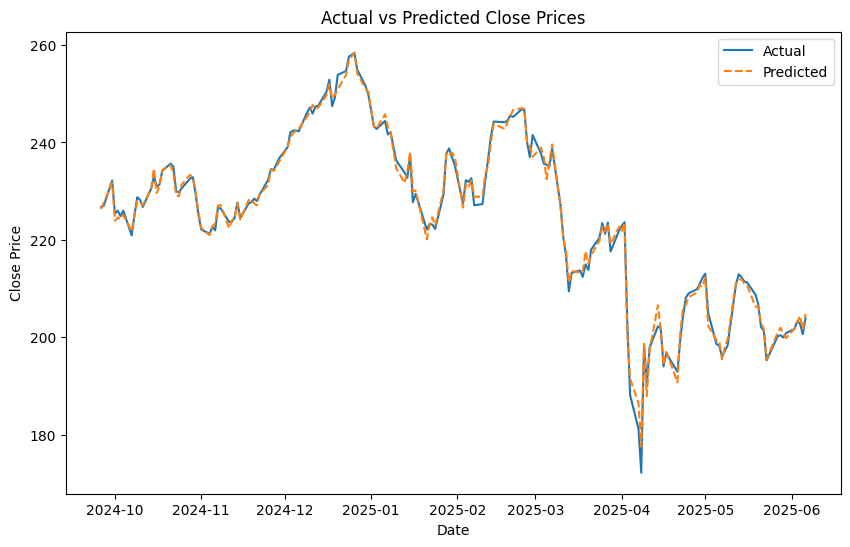

In [5]:
df=pd.read_csv("..\data\processed\AAPL_processed.csv",index_col='Date',parse_dates=True)
features = ['Open','High','Low','Volume','MA10','MA50','Returns','Volatility']
target='Close'
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.2)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

model=LinearRegression()
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

### XGBoost

In [4]:
pip install xgboost --quiet


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


RMSE: 8.42
R2 Score: 0.75


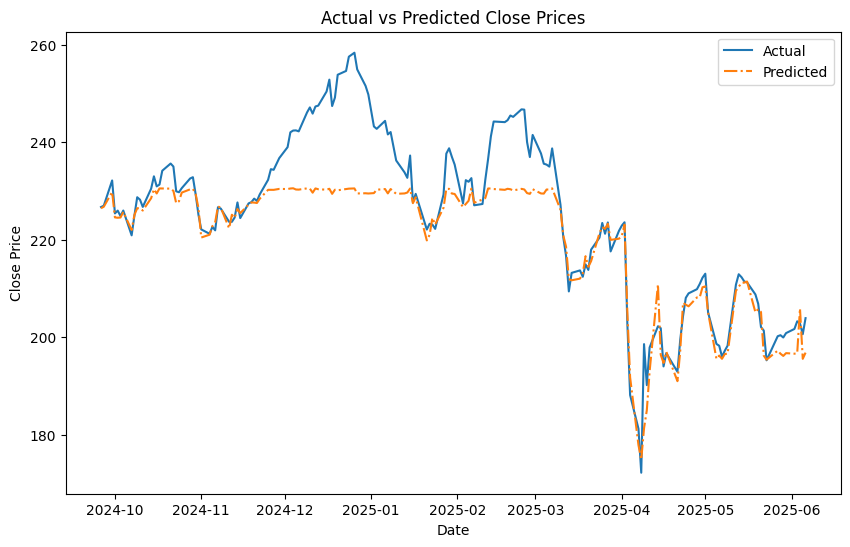

In [8]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1,max_depth=5,random_state=42)

xgb_model.fit(x_train,y_train)
y_pred= xgb_model.predict(x_test)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='-.')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

RMSE: 5.00
R2 Score: 1.00


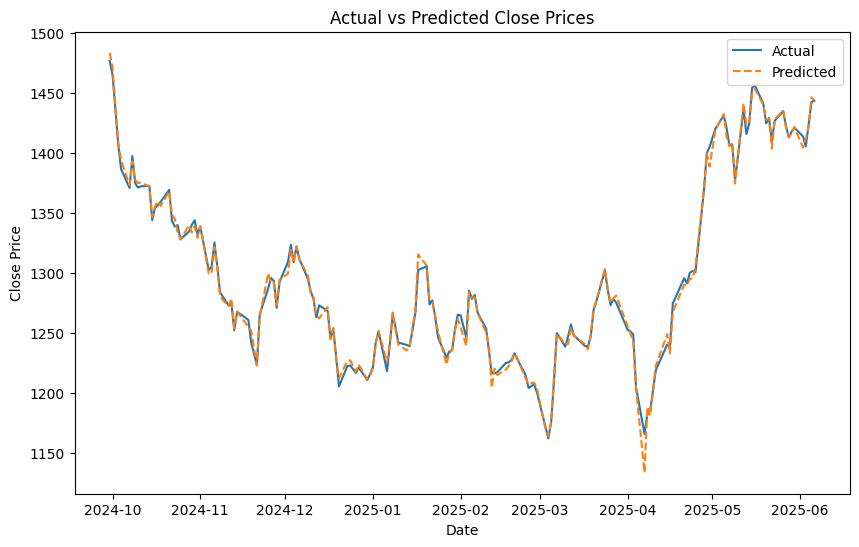

In [25]:
from xgboost import XGBRegressor
df=pd.read_csv("..\data\processed\RELIANCE.NS_processed.csv",index_col='Date',parse_dates=True)
features = ['Open','High','Low','Volume','MA10','MA50','Returns','Volatility']
target='Close'
x=df[features]
y=df[target]
x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.2)

scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
# model = XGBRegressor(n_estimators=1000, learning_rate=0.1,max_depth=5,random_state=30)
model=LinearRegression()
model.fit(x_train_scaled,y_train)

y_pred=model.predict(x_test_scaled)

rmse=np.sqrt(mean_squared_error(y_test,y_pred))
r2=r2_score(y_test,y_pred)

print(f"RMSE: {rmse:.2f}")
print(f"R2 Score: {r2:.2f}")

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted', linestyle='--')
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()

from the current understanding of comparison of models to different data source i think it would be better to stick with linear regression as a great approach

### Training each model for each ticker seems like a greeat approach for now

In [26]:
tickers = [
    "AAPL", "GOOGL", "MSFT", "TSLA",
    "RELIANCE.NS", "TCS.NS", "INFY.NS", "WIPRO.NS",
    "^NSEI", "^BSESN", "^GSPC"
]

In [28]:
import joblib

In [29]:
for ticker in tickers:
    df=pd.read_csv(f"..\data\processed\{ticker}_processed.csv")
    features = ['Open','High','Low','Volume','MA10','MA50','Returns','Volatility']
    target='Close'
    x=df[features]
    y=df[target]
    x_train,x_test,y_train,y_test=train_test_split(x,y,shuffle=False,test_size=0.2)

    scaler=StandardScaler()
    x_train_scaled=scaler.fit_transform(x_train)
    x_test_scaled=scaler.transform(x_test)
    model=LinearRegression()
    model.fit(x_train_scaled,y_train)

    joblib.dump(model, f"..\models\{ticker}_linear.pkl")

Current directory: c:\Users\Amar007thegrt\Desktop\StAI\notebooks

Files and folders in current directory:
📄 data_collection.ipynb
📄 eda.ipynb
📄 model_train.ipynb

Directory tree structure:
notebooks/
├── data_collection.ipynb
├── eda.ipynb
└── model_train.ipynb
